In [1]:
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
puzzle = cv2.imread('waldo_puzzle.jpg')
waldo = cv2.imread('waldo_query.png')
(waldoHeight, waldoWidth) = waldo.shape[:2]

In [3]:
# find the waldo in the puzzle
#Using the cv2.TM_CCOEFF method for now as it takes the image of Waldo and compares it to the puzzle finding possible matches
result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

In [4]:
# grab the bounding box of waldo and extract him from the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
region_of_interest = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]
 
# construct a darkened transparent 'layer' to darken everything in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

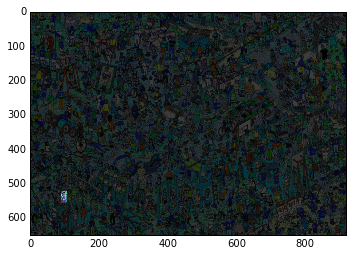

In [15]:
# put the original waldo back in the image so that he is
# 'brighter' than the rest of the image
puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = region_of_interest

#Display Imagine
plt.imshow(imutils.resize(puzzle, height=650))
plt.show()